In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_nyc_bicycle = pd.read_csv('nyc-east-river-bicycle-counts.csv',  index_col=0)

In [3]:
df_nyc_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 210 non-null    object 
 1   Day                  210 non-null    object 
 2   High Temp (°F)       210 non-null    float64
 3   Low Temp (°F)        210 non-null    float64
 4   Precipitation        210 non-null    object 
 5   Brooklyn Bridge      210 non-null    float64
 6   Manhattan Bridge     210 non-null    int64  
 7   Williamsburg Bridge  210 non-null    float64
 8   Queensboro Bridge    210 non-null    float64
 9   Total                210 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 18.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2

# Datasetul a fost descarcat de pe kaggle https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings si reprezinta un set de date care contine  informatii referitoare la numarul de biciclete  care intră sau ies din Manhattan printr-unul dintre podurile East River. Contine 210 observatii, cu 10 de caracteristici(variabile) din care 4 sunt de tip 'object', 5 sunt de tip 'float64' si 2 de tip 'int64'.
Pasi de urmat:
1. explorarea datelor: 
  1.1. determinare structura df;
  1.2  determinarea tipului de date, nr de observatii si caracteristici(coloane);
2. curatarea datelor: 
  2.1. facem o copie a df;
  2.2. transformarea datelor din primele doua coloane in format date_time;
  2.3  transformarea datelor tip obiect din coloana 'Precipitation' in float64;
  2.4  transformarea temperaturlior in grade Celsius;
  2.5  uniformizarea tipurilor de date de pe ultimele 5 coloane - transformarea in int64;
  2.6. verificam noua structura structura a df;
3. analiza datelor:
  3.1. Profil Report
  3.2. folosim statistici descriptive;
  3.3. analiza corelatilor;
  3.4. 
4. interpretarea datelor:
  4.1 Concluzii.

In [4]:
df_nyc_bicycle.sample(10)

Date                  Day  High Temp (°F)  Low Temp (°F)  \
86   2016-04-27 00:00:00  2016-04-27 00:00:00            62.1           46.9   
94   2016-04-05 00:00:00  2016-04-05 00:00:00            42.1           26.1   
176  2016-04-27 00:00:00  2016-04-27 00:00:00            62.1           46.9   
43   2016-04-14 00:00:00  2016-04-14 00:00:00            62.1           44.6   
7    2016-04-08 00:00:00  2016-04-08 00:00:00            46.9           44.1   
168  2016-04-19 00:00:00  2016-04-19 00:00:00            71.1           63.0   
19   2016-04-20 00:00:00  2016-04-20 00:00:00            68.0           50.0   
130  2016-04-11 00:00:00  2016-04-11 00:00:00            62.1           46.0   
51   2016-04-22 00:00:00  2016-04-22 00:00:00            78.1           63.0   
115  2016-04-26 00:00:00  2016-04-26 00:00:00            60.1           46.9   

    Precipitation  Brooklyn Bridge  Manhattan Bridge  Williamsburg Bridge  \
86              0           3343.0              5606               6577.0   
94              0           1416.0              2617               3081.0   
176             0           3343.0              5606               6577.0   
43              0           2861.0              5309               6030.0   
7            0.01           1982.0              3455               4113.0   
168             0           3501.0              6951               7834.0   
19              0           3450.0              6574               7639.0   
130          0.01           2005.0              3791               4334.0   
51              T           2975.0              4907               6093.0   
115          0.24           1997.0              3520               4559.0   

     Queensboro Bridge  Total  
86              4388.0  19914  
94              2357.0   9471  
176             4388.0  19914  
43              4115.0  18315  
7               3194.0  12744  
168             5032.0  23318  
19              4928.0  22591  
130             3182.0  13312  
51              3862.0  17837  
115             2929.0  13005

Date                  Day  High Temp (°F)  Low Temp (°F)  \
86   2016-04-27 00:00:00  2016-04-27 00:00:00            62.1           46.9   
94   2016-04-05 00:00:00  2016-04-05 00:00:00            42.1           26.1   
176  2016-04-27 00:00:00  2016-04-27 00:00:00            62.1           46.9   
43   2016-04-14 00:00:00  2016-04-14 00:00:00            62.1           44.6   
7    2016-04-08 00:00:00  2016-04-08 00:00:00            46.9           44.1   
168  2016-04-19 00:00:00  2016-04-19 00:00:00            71.1           63.0   
19   2016-04-20 00:00:00  2016-04-20 00:00:00            68.0           50.0   
130  2016-04-11 00:00:00  2016-04-11 00:00:00            62.1           46.0   
51   2016-04-22 00:00:00  2016-04-22 00:00:00            78.1           63.0   
115  2016-04-26 00:00:00  2016-04-26 00:00:00            60.1           46.9   

    Precipitation  Brooklyn Bridge  Manhattan Bridge  Williamsburg Bridge  \
86              0           3343.0              5606               6577.0   
94              0           1416.0              2617               3081.0   
176             0           3343.0              5606               6577.0   
43              0           2861.0              5309               6030.0   
7            0.01           1982.0              3455               4113.0   
168             0           3501.0              6951               7834.0   
19              0           3450.0              6574               7639.0   
130          0.01           2005.0              3791               4334.0   
51              T           2975.0              4907               6093.0   
115          0.24           1997.0              3520               4559.0   

     Queensboro Bridge  Total  
86              4388.0  19914  
94              2357.0   9471  
176             4388.0  19914  
43              4115.0  18315  
7               3194.0  12744  
168             5032.0  23318  
19              4928.0  22591  
130             3182.0  13312  
51              3862.0  17837  
115             2929.0  13005

In [5]:
df = pd.read_csv('nyc-east-river-bicycle-counts.csv',  index_col=0)

In [6]:
df.columns

Index(['Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation',
       'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge',
       'Queensboro Bridge', 'Total'],
      dtype='object')

Index(['Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation',
       'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge',
       'Queensboro Bridge', 'Total'],
      dtype='object')

Am modificat denumirea coloanelor ptr a le putea folosi fara paranteze

In [7]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [8]:
df.columns

Index(['Date', 'Day', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

Index(['Date', 'Day', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

Am sters coloana 'Day' intrucat continea aceleasi informatii din coloana 'Date'

In [9]:
df = df.drop(columns = ['Day'])

In [10]:
df.columns

Index(['Date', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

Index(['Date', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

Transformam tipul datelor din coloana 'Date' in format date_time si verificam care a fost intervalul de timp in care s-au facut masuratorile

In [11]:
from datetime import datetime

In [12]:
df[['Date']] = df[["Date"]].apply(pd.to_datetime)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 210 non-null    datetime64[ns]
 1   High_Temp_(°F)       210 non-null    float64       
 2   Low_Temp_(°F)        210 non-null    float64       
 3   Precipitation        210 non-null    object        
 4   Brooklyn_Bridge      210 non-null    float64       
 5   Manhattan_Bridge     210 non-null    int64         
 6   Williamsburg_Bridge  210 non-null    float64       
 7   Queensboro_Bridge    210 non-null    float64       
 8   Total                210 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 16.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               

In [14]:
df[['Date']].sample(10)

Date
35  2016-04-06
122 2016-04-03
87  2016-04-28
172 2016-04-23
178 2016-04-29
52  2016-04-23
9   2016-04-10
3   2016-04-04
195 2016-04-16
200 2016-04-21

Date
35  2016-04-06
122 2016-04-03
87  2016-04-28
172 2016-04-23
178 2016-04-29
52  2016-04-23
9   2016-04-10
3   2016-04-04
195 2016-04-16
200 2016-04-21

In [15]:
df.Date.min()

Timestamp('2016-04-01 00:00:00')

Timestamp('2016-04-01 00:00:00')

In [16]:
df.Date.max()

Timestamp('2016-04-30 00:00:00')

Timestamp('2016-04-30 00:00:00')

In [17]:
df['Date'].dt.year.sample(10)

157    2016
85     2016
13     2016
130    2016
90     2016
134    2016
99     2016
128    2016
12     2016
175    2016
Name: Date, dtype: int64

157    2016
85     2016
13     2016
130    2016
90     2016
134    2016
99     2016
128    2016
12     2016
175    2016
Name: Date, dtype: int64

In [18]:
df['Date'].dt.month.sample(10)

199    4
171    4
177    4
204    4
73     4
22     4
24     4
52     4
16     4
51     4
Name: Date, dtype: int64

199    4
171    4
177    4
204    4
73     4
22     4
24     4
52     4
16     4
51     4
Name: Date, dtype: int64

In [19]:
df['Date'].value_counts()

2016-04-01    7
2016-04-02    7
2016-04-29    7
2016-04-28    7
2016-04-27    7
2016-04-26    7
2016-04-25    7
2016-04-24    7
2016-04-23    7
2016-04-22    7
2016-04-21    7
2016-04-20    7
2016-04-19    7
2016-04-18    7
2016-04-17    7
2016-04-16    7
2016-04-15    7
2016-04-14    7
2016-04-13    7
2016-04-12    7
2016-04-11    7
2016-04-10    7
2016-04-09    7
2016-04-08    7
2016-04-07    7
2016-04-06    7
2016-04-05    7
2016-04-04    7
2016-04-03    7
2016-04-30    7
Name: Date, dtype: int64

2016-04-01    7
2016-04-02    7
2016-04-29    7
2016-04-28    7
2016-04-27    7
2016-04-26    7
2016-04-25    7
2016-04-24    7
2016-04-23    7
2016-04-22    7
2016-04-21    7
2016-04-20    7
2016-04-19    7
2016-04-18    7
2016-04-17    7
2016-04-16    7
2016-04-15    7
2016-04-14    7
2016-04-13    7
2016-04-12    7
2016-04-11    7
2016-04-10    7
2016-04-09    7
2016-04-08    7
2016-04-07    7
2016-04-06    7
2016-04-05    7
2016-04-04    7
2016-04-03    7
2016-04-30    7
Name: Date, dtype: int64

Verificam daca exista randuri duplicate si le stergem 

In [20]:
df[df['Date'] == '2016-04-06']

Date  High_Temp_(°F)  Low_Temp_(°F) Precipitation  Brooklyn_Bridge  \
5   2016-04-06            45.0           30.0             0           1885.0   
35  2016-04-06            45.0           30.0             0           1885.0   
65  2016-04-06            45.0           30.0             0           1885.0   
95  2016-04-06            45.0           30.0             0           1885.0   
125 2016-04-06            45.0           30.0             0           1885.0   
155 2016-04-06            45.0           30.0             0           1885.0   
185 2016-04-06            45.0           30.0             0           1885.0   

     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
5                3329               3856.0             2849.0  11919  
35               3329               3856.0             2849.0  11919  
65               3329               3856.0             2849.0  11919  
95               3329               3856.0             2849.0  11919  
125              3329               3856.0             2849.0  11919  
155              3329               3856.0             2849.0  11919  
185              3329               3856.0             2849.0  11919

Date  High_Temp_(°F)  Low_Temp_(°F) Precipitation  Brooklyn_Bridge  \
5   2016-04-06            45.0           30.0             0           1885.0   
35  2016-04-06            45.0           30.0             0           1885.0   
65  2016-04-06            45.0           30.0             0           1885.0   
95  2016-04-06            45.0           30.0             0           1885.0   
125 2016-04-06            45.0           30.0             0           1885.0   
155 2016-04-06            45.0           30.0             0           1885.0   
185 2016-04-06            45.0           30.0             0           1885.0   

     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
5                3329               3856.0             2849.0  11919  
35               3329               3856.0             2849.0  11919  
65               3329               3856.0             2849.0  11919  
95               3329               3856.0             2849.0  11919  
125              3329               3856.0             2849.0  11919  
155              3329               3856.0             2849.0  11919  
185              3329               3856.0             2849.0  11919

In [21]:
df[df['Date'] == '2016-04-11']

Date  High_Temp_(°F)  Low_Temp_(°F) Precipitation  Brooklyn_Bridge  \
10  2016-04-11            62.1           46.0          0.01           2005.0   
40  2016-04-11            62.1           46.0          0.01           2005.0   
70  2016-04-11            62.1           46.0          0.01           2005.0   
100 2016-04-11            62.1           46.0          0.01           2005.0   
130 2016-04-11            62.1           46.0          0.01           2005.0   
160 2016-04-11            62.1           46.0          0.01           2005.0   
190 2016-04-11            62.1           46.0          0.01           2005.0   

     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
10               3791               4334.0             3182.0  13312  
40               3791               4334.0             3182.0  13312  
70               3791               4334.0             3182.0  13312  
100              3791               4334.0             3182.0  13312  
130              3791               4334.0             3182.0  13312  
160              3791               4334.0             3182.0  13312  
190              3791               4334.0             3182.0  13312

Date  High_Temp_(°F)  Low_Temp_(°F) Precipitation  Brooklyn_Bridge  \
10  2016-04-11            62.1           46.0          0.01           2005.0   
40  2016-04-11            62.1           46.0          0.01           2005.0   
70  2016-04-11            62.1           46.0          0.01           2005.0   
100 2016-04-11            62.1           46.0          0.01           2005.0   
130 2016-04-11            62.1           46.0          0.01           2005.0   
160 2016-04-11            62.1           46.0          0.01           2005.0   
190 2016-04-11            62.1           46.0          0.01           2005.0   

     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
10               3791               4334.0             3182.0  13312  
40               3791               4334.0             3182.0  13312  
70               3791               4334.0             3182.0  13312  
100              3791               4334.0             3182.0  13312  
130              3791               4334.0             3182.0  13312  
160              3791               4334.0             3182.0  13312  
190              3791               4334.0             3182.0  13312

In [22]:
df1 = df.drop_duplicates()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High_Temp_(°F)       30 non-null     float64       
 2   Low_Temp_(°F)        30 non-null     float64       
 3   Precipitation        30 non-null     object        
 4   Brooklyn_Bridge      30 non-null     float64       
 5   Manhattan_Bridge     30 non-null     int64         
 6   Williamsburg_Bridge  30 non-null     float64       
 7   Queensboro_Bridge    30 non-null     float64       
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 2.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               -----

In [24]:
df1

Date  High_Temp_(°F)  Low_Temp_(°F) Precipitation  Brooklyn_Bridge  \
0  2016-04-01            78.1           66.0          0.01           1704.0   
1  2016-04-02            55.0           48.9          0.15            827.0   
2  2016-04-03            39.9           34.0          0.09            526.0   
3  2016-04-04            44.1           33.1      0.47 (S)            521.0   
4  2016-04-05            42.1           26.1             0           1416.0   
5  2016-04-06            45.0           30.0             0           1885.0   
6  2016-04-07            57.0           53.1          0.09           1276.0   
7  2016-04-08            46.9           44.1          0.01           1982.0   
8  2016-04-09            43.0           37.9          0.09            504.0   
9  2016-04-10            48.9           30.9             0           1447.0   
10 2016-04-11            62.1           46.0          0.01           2005.0   
11 2016-04-12            57.0           45.0           0.2           1045.0   
12 2016-04-13            57.0           39.9             0           2840.0   
13 2016-04-14            62.1           44.6             0           2861.0   
14 2016-04-15            64.0           44.1             0           2770.0   
15 2016-04-16            66.0           45.0             0           2384.0   
16 2016-04-17            73.9           46.0             0           3147.0   
17 2016-04-18            81.0           52.0             0           3871.0   
18 2016-04-19            71.1           63.0             0           3501.0   
19 2016-04-20            68.0           50.0             0           3450.0   
20 2016-04-21            71.1           50.0             0           3436.0   
21 2016-04-22            78.1           63.0             T           2975.0   
22 2016-04-23            70.0           61.0          0.16           2055.0   
23 2016-04-24            68.0           48.0             0           2798.0   
24 2016-04-25            66.9           54.0             0           3463.0   
25 2016-04-26            60.1           46.9          0.24           1997.0   
26 2016-04-27            62.1           46.9             0           3343.0   
27 2016-04-28            57.9           48.0             0           2486.0   
28 2016-04-29            57.0           46.9          0.05           2375.0   
29 2016-04-30            64.0           48.0             0           3199.0   

    Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
0               3126               4115.0             2552.0  11497  
1               1646               2565.0             1884.0   6922  
2               1232               1695.0             1306.0   4759  
3               1067               1440.0             1307.0   4335  
4               2617               3081.0             2357.0   9471  
5               3329               3856.0             2849.0  11919  
6               2581               3282.0             2457.0   9596  
7               3455               4113.0             3194.0  12744  
8                997               1507.0             1502.0   4510  
9               2387               3132.0             2160.0   9126  
10              3791               4334.0             3182.0  13312  
11              2178               2762.0             2082.0   8067  
12              5395               5995.0             4192.0  18422  
13              5309               6030.0             4115.0  18315  
14              5072               5816.0             3912.0  17570  
15              4316               5624.0             4051.0  16375  
16              4969               5867.0             4197.0  18180  
17              6823               7432.0             4964.0  23090  
18              6951               7834.0             5032.0  23318  
19              6574               7639.0             4928.0  22591  
20              6452               7426.0             4813.0  22127  
21              490

Date  High_Temp_(°F)  Low_Temp_(°F) Precipitation  Brooklyn_Bridge  \
0  2016-04-01            78.1           66.0          0.01           1704.0   
1  2016-04-02            55.0           48.9          0.15            827.0   
2  2016-04-03            39.9           34.0          0.09            526.0   
3  2016-04-04            44.1           33.1      0.47 (S)            521.0   
4  2016-04-05            42.1           26.1             0           1416.0   
5  2016-04-06            45.0           30.0             0           1885.0   
6  2016-04-07            57.0           53.1          0.09           1276.0   
7  2016-04-08            46.9           44.1          0.01           1982.0   
8  2016-04-09            43.0           37.9          0.09            504.0   
9  2016-04-10            48.9           30.9             0           1447.0   
10 2016-04-11            62.1           46.0          0.01           2005.0   
11 2016-04-12            57.0           45.0           0.2           1045.0   
12 2016-04-13            57.0           39.9             0           2840.0   
13 2016-04-14            62.1           44.6             0           2861.0   
14 2016-04-15            64.0           44.1             0           2770.0   
15 2016-04-16            66.0           45.0             0           2384.0   
16 2016-04-17            73.9           46.0             0           3147.0   
17 2016-04-18            81.0           52.0             0           3871.0   
18 2016-04-19            71.1           63.0             0           3501.0   
19 2016-04-20            68.0           50.0             0           3450.0   
20 2016-04-21            71.1           50.0             0           3436.0   
21 2016-04-22            78.1           63.0             T           2975.0   
22 2016-04-23            70.0           61.0          0.16           2055.0   
23 2016-04-24            68.0           48.0             0           2798.0   
24 2016-04-25            66.9           54.0             0           3463.0   
25 2016-04-26            60.1           46.9          0.24           1997.0   
26 2016-04-27            62.1           46.9             0           3343.0   
27 2016-04-28            57.9           48.0             0           2486.0   
28 2016-04-29            57.0           46.9          0.05           2375.0   
29 2016-04-30            64.0           48.0             0           3199.0   

    Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
0               3126               4115.0             2552.0  11497  
1               1646               2565.0             1884.0   6922  
2               1232               1695.0             1306.0   4759  
3               1067               1440.0             1307.0   4335  
4               2617               3081.0             2357.0   9471  
5               3329               3856.0             2849.0  11919  
6               2581               3282.0             2457.0   9596  
7               3455               4113.0             3194.0  12744  
8                997               1507.0             1502.0   4510  
9               2387               3132.0             2160.0   9126  
10              3791               4334.0             3182.0  13312  
11              2178               2762.0             2082.0   8067  
12              5395               5995.0             4192.0  18422  
13              5309               6030.0             4115.0  18315  
14              5072               5816.0             3912.0  17570  
15              4316               5624.0             4051.0  16375  
16              4969               5867.0             4197.0  18180  
17              6823               7432.0             4964.0  23090  
18              6951               7834.0             5032.0  23318  
19              6574               7639.0             4928.0  22591  
20              6452               7426.0             4813.0  22127  
21              490

Transformaa datele de tip obiect din coloana 'Precipitation' in float64

In [25]:
df1.iloc[3, 3] = '0.47'

In [26]:
df1.iloc[3, 3]

'0.47'

'0.47'

In [27]:
df1.iloc[21, 3] = '0'

In [28]:
df1.iloc[21, 3] 

'0'

'0'

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High_Temp_(°F)       30 non-null     float64       
 2   Low_Temp_(°F)        30 non-null     float64       
 3   Precipitation        30 non-null     object        
 4   Brooklyn_Bridge      30 non-null     float64       
 5   Manhattan_Bridge     30 non-null     int64         
 6   Williamsburg_Bridge  30 non-null     float64       
 7   Queensboro_Bridge    30 non-null     float64       
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 2.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               -----

In [30]:
df1.Precipitation = df1.Precipitation.astype('float64')

C:\Users\nechi\AppData\Local\Temp\ipykernel_20044\2611732507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Precipitation = df1.Precipitation.astype('float64')
C:\Users\nechi\AppData\Local\Temp\ipykernel_20044\2611732507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Precipitation = df1.Precipitation.astype('float64')


In [31]:
df1.Precipitation.dtype

dtype('float64')

dtype('float64')

Transformam temperaturlior din grade Fahrenheit in grade Celsius;

In [32]:
df1.loc[[3],['High_Temp_(°F)']]

High_Temp_(°F)
3            44.1

High_Temp_(°F)
3            44.1

In [33]:
df1.loc[[3],['High_Temp_(°F)']].apply(lambda x: (x - 32) * (5 / 9))

High_Temp_(°F)
3        6.722222

High_Temp_(°F)
3        6.722222

In [34]:
df1[['High_Temp_(°F)', 'Low_Temp_(°F)', ]] = df1[['High_Temp_(°F)', 'Low_Temp_(°F)', ]].apply(lambda x: (x - 32) * (5 / 9))

C:\Users\nechi\AppData\Local\Temp\ipykernel_20044\3258853837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['High_Temp_(°F)', 'Low_Temp_(°F)', ]] = df1[['High_Temp_(°F)', 'Low_Temp_(°F)', ]].apply(lambda x: (x - 32) * (5 / 9))
C:\Users\nechi\AppData\Local\Temp\ipykernel_20044\3258853837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['High_Temp_(°F)', 'Low_Temp_(°F)', ]] = df1[['High_Temp_(°F)', 'Low_Temp_(°F)', ]].apply(lambda x: (x - 32) * (5 / 9))


In [35]:
df1[['High_Temp_(°F)', 'Low_Temp_(°F)', ]].sample(5)

High_Temp_(°F)  Low_Temp_(°F)
28       13.888889       8.277778
22       21.111111      16.111111
7         8.277778       6.722222
21       25.611111      17.222222
9         9.388889      -0.611111

High_Temp_(°F)  Low_Temp_(°F)
28       13.888889       8.277778
22       21.111111      16.111111
7         8.277778       6.722222
21       25.611111      17.222222
9         9.388889      -0.611111

In [36]:
df1.columns 

Index(['Date', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

Index(['Date', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

In [37]:
df1.columns = ['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total']

In [38]:
df1.columns

Index(['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge',
       'Total'],
      dtype='object')

Index(['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge',
       'Total'],
      dtype='object')

Uniformizarea tipurilor de date de pe ultimele 5 coloane - transformarea in int64

In [39]:
df1[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge', 'Total']] = df1[['Brooklyn_Bridge', 
                                                                                                         'Manhattan_Bridge',
                                                                                                         'Williamsburg_Bridge', 
                                                                                                         'Queensboro_Bridge', 
                                                                                                         'Total']].astype('int64')

C:\Users\nechi\AppData\Local\Temp\ipykernel_20044\2845835809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge', 'Total']] = df1[['Brooklyn_Bridge',
C:\Users\nechi\AppData\Local\Temp\ipykernel_20044\2845835809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge', 'Total']] = df1[['Brooklyn_Bridge',


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High_Temp_C          30 non-null     float64       
 2   Low_Temp_C           30 non-null     float64       
 3   Precipitation        30 non-null     float64       
 4   Brooklyn_Bridge      30 non-null     int64         
 5   Manhattan_Bridge     30 non-null     int64         
 6   Williamsburg_Bridge  30 non-null     int64         
 7   Queensboro_Bridge    30 non-null     int64         
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 3.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -

Analiza datelor - Profil Report 

In [44]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
from pandas_profiling import ProfileReport

In [47]:
profil_report = ProfileReport(df1, title = 'NY_East_River_bicycle_counts_report')

In [48]:
profil_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
df1.describe()

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
count    30.000000   30.000000      30.000000        30.000000   
mean     15.877778    8.007407       0.052333      2269.633333   
std       6.304049    5.368057       0.103647       995.633241   
min       4.388889   -3.277778       0.000000       504.000000   
25%      13.055556    6.722222       0.000000      1511.250000   
50%      16.722222    8.277778       0.000000      2379.500000   
75%      20.000000   10.000000       0.080000      3104.000000   
max      27.222222   18.888889       0.470000      3871.000000   

       Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge         Total  
count         30.000000            30.000000          30.000000     30.000000  
mean        4049.533333          4862.466667        3352.866667  14534.500000  
std         1729.740976          1840.652747        1115.381263   5650.877227  
min          997.000000          1440.000000        1306.000000   4335.000000  
25%         2744.250000          3425.500000        2480.750000  10071.250000  
50%         4165.000000          5194.000000        3477.000000  15292.500000  
75%         5249.750000          6021.250000        4172.750000  18281.250000  
max         6951.000000          7834.000000        5032.000000  23318.000000

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
count    30.000000   30.000000      30.000000        30.000000   
mean     15.877778    8.007407       0.052333      2269.633333   
std       6.304049    5.368057       0.103647       995.633241   
min       4.388889   -3.277778       0.000000       504.000000   
25%      13.055556    6.722222       0.000000      1511.250000   
50%      16.722222    8.277778       0.000000      2379.500000   
75%      20.000000   10.000000       0.080000      3104.000000   
max      27.222222   18.888889       0.470000      3871.000000   

       Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge         Total  
count         30.000000            30.000000          30.000000     30.000000  
mean        4049.533333          4862.466667        3352.866667  14534.500000  
std         1729.740976          1840.652747        1115.381263   5650.877227  
min          997.000000          1440.000000        1306.000000   4335.000000  
25%         2744.250000          3425.500000        2480.750000  10071.250000  
50%         4165.000000          5194.000000        3477.000000  15292.500000  
75%         5249.750000          6021.250000        4172.750000  18281.250000  
max         6951.000000          7834.000000        5032.000000  23318.000000

In [50]:
df1.corr()

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
High_Temp_C             1.000000    0.823853      -0.345898         0.739377   
Low_Temp_C              0.823853    1.000000      -0.165441         0.464550   
Precipitation          -0.345898   -0.165441       1.000000        -0.599514   
Brooklyn_Bridge         0.739377    0.464550      -0.599514         1.000000   
Manhattan_Bridge        0.720175    0.465097      -0.588419         0.983148   
Williamsburg_Bridge     0.764336    0.534212      -0.576076         0.980463   
Queensboro_Bridge       0.727825    0.475725      -0.596254         0.976991   
Total                   0.743344    0.492124      -0.591079         0.989339   

                     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
High_Temp_C                  0.720175             0.764336           0.727825   
Low_Temp_C                   0.465097             0.534212           0.475725   
Precipitation               -0.588419            -0.576076          -0.596254   
Brooklyn_Bridge              0.983148             0.980463           0.976991   
Manhattan_Bridge             1.000000             0.989805           0.985867   
Williamsburg_Bridge          0.989805             1.000000           0.988852   
Queensboro_Bridge            0.985867             0.988852           1.000000   
Total                        0.996323             0.996639           0.993391   

                        Total  
High_Temp_C          0.743344  
Low_Temp_C           0.492124  
Precipitation       -0.591079  
Brooklyn_Bridge      0.989339  
Manhattan_Bridge     0.996323  
Williamsburg_Bridge  0.996639  
Queensboro_Bridge    0.993391  
Total                1.000000

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
High_Temp_C             1.000000    0.823853      -0.345898         0.739377   
Low_Temp_C              0.823853    1.000000      -0.165441         0.464550   
Precipitation          -0.345898   -0.165441       1.000000        -0.599514   
Brooklyn_Bridge         0.739377    0.464550      -0.599514         1.000000   
Manhattan_Bridge        0.720175    0.465097      -0.588419         0.983148   
Williamsburg_Bridge     0.764336    0.534212      -0.576076         0.980463   
Queensboro_Bridge       0.727825    0.475725      -0.596254         0.976991   
Total                   0.743344    0.492124      -0.591079         0.989339   

                     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
High_Temp_C                  0.720175             0.764336           0.727825   
Low_Temp_C                   0.465097             0.534212           0.475725   
Precipitation               -0.588419            -0.576076          -0.596254   
Brooklyn_Bridge              0.983148             0.980463           0.976991   
Manhattan_Bridge             1.000000             0.989805           0.985867   
Williamsburg_Bridge          0.989805             1.000000           0.988852   
Queensboro_Bridge            0.985867             0.988852           1.000000   
Total                        0.996323             0.996639           0.993391   

                        Total  
High_Temp_C          0.743344  
Low_Temp_C           0.492124  
Precipitation       -0.591079  
Brooklyn_Bridge      0.989339  
Manhattan_Bridge     0.996323  
Williamsburg_Bridge  0.996639  
Queensboro_Bridge    0.993391  
Total                1.000000

In [46]:
#df1.corr()['High_Temp_C'].sort_values()

In [51]:
sns.heatmap(df1.corr())

<AxesSubplot:>

<AxesSubplot:>

In [48]:
df1.columns

Index(['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge',
       'Total'],
      dtype='object')

In [53]:
g = sns.boxplot(data = df1[['Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge']], orient = 'o',  width = 0.8, fliersize = 10)
g.xaxis.set_tick_params(rotation = 90)

In [54]:
import scipy.stats as stats

In [55]:
df1.columns

Index(['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge',
       'Total'],
      dtype='object')

Index(['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge',
       'Total'],
      dtype='object')

In [56]:
df1 = df1.drop(columns = ['Date'])

In [61]:
df2= stats.zscore(df1)
df2

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  Manhattan_Bridge  \
0      1.570376    2.061734      -0.415421        -0.577826         -0.543042   
1     -0.500154    0.261752       0.958412        -1.473731         -1.413288   
2     -1.853617   -1.306653       0.369627        -1.781219         -1.656722   
3     -1.477157   -1.401389       4.098603        -1.786327         -1.753743   
4     -1.656424   -2.138224      -0.513552        -0.872034         -0.842336   
5     -1.396487   -1.727702      -0.513552        -0.392925         -0.423677   
6     -0.320887    0.703853       0.369627        -1.015052         -0.863504   
7     -1.226184   -0.243506      -0.415421        -0.293834         -0.349588   
8     -1.575754   -0.896131       0.369627        -1.803694         -1.794903   
9     -1.046917   -1.632966      -0.513552        -0.840366         -0.977577   
10     0.136243   -0.043508      -0.415421        -0.270338         -0.152019   
11    -0.320887   -0.148770       1.449067        -1.251032         -1.100470   
12    -0.320887   -0.685607      -0.513552         0.582662          0.791140   
13     0.136243   -0.190875      -0.513552         0.604114          0.740572   
14     0.306546   -0.243506      -0.513552         0.511153          0.601215   
15     0.485813   -0.148770      -0.513552         0.116832          0.156684   
16     1.193916   -0.043508      -0.513552         0.896279          0.540650   
17     1.830313    0.588064      -0.513552         1.635886          1.630811   
18     0.942943    1.745947      -0.513552         1.257910          1.706075   
19     0.665079    0.377540      -0.513552         1.205811          1.484397   
20     0.942943    0.377540      -0.513552         1.191509          1.412661   
21     1.570376    1.745947      -0.513552         0.720572          0.504194   
22     0.844346    1.535423       1.056543        -0.219260         -0.454841   
23     0.665079    0.167016      -0.513552         0.539756          0.353077   
24     0.566483    0.798588      -0.513552         1.219091          1.133947   
25    -0.043024    0.051228       1.841591        -0.278510         -0.311368   
26     0.136243    0.051228      -0.513552         1.096504          0.915209   
27    -0.240217    0.167016      -0.513552         0.221031          0.060251   
28    -0.320887    0.051228      -0.022897         0.107638          0.075539   
29     0.306546    0.167016      -0.513552         0.949400          0.530654   

    Williamsburg_Bridge  Queensboro_Bridge     Total  
0             -0.413030          -0.730295 -0.546716  
1             -1.269518          -1.339432 -1.370166  
2             -1.750257          -1.866499 -1.759482  
3             -1.891163          -1.865587 -1.835797  
4             -0.984391          -0.908112 -0.911374  
5             -0.556146          -0.459467 -0.470761  
6             -0.873323          -0.816924 -0.888875  
7             -0.414135          -0.144868 -0.322270  
8             -1.854141          -1.687771 -1.804299  
9             -0.956209          -1.087753 -0.973470  
10            -0.292016          -0.155810 -0.220036  
11            -1.160661          -1.158879 -1.164078  
12             0.625807           0.765190  0.699707  
13             0.645148           0.694975  0.680448  
14             0.526897           0.509863  0.546356  
15             0.420803           0.636615  0.331270  
16             0.555078           0.769749  0.656150  
17             1.419855           1.469162  1.539895  
18             1.641989           1.531170  1.580933  
19             1.534238           1.436335  1.450081  
20             1.416540           1.331468  1.366566  
21             0.679960           0.464269  0.594413  
22            -0.003573          -0.103833 -0.199518  
23             0.261109           0.550898  0.396966  
24             1.095495           1.104410  1.136720  
25            -0.167688          -0.386516 -0.275293  
26     

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  Manhattan_Bridge  \
0      1.570376    2.061734      -0.415421        -0.577826         -0.543042   
1     -0.500154    0.261752       0.958412        -1.473731         -1.413288   
2     -1.853617   -1.306653       0.369627        -1.781219         -1.656722   
3     -1.477157   -1.401389       4.098603        -1.786327         -1.753743   
4     -1.656424   -2.138224      -0.513552        -0.872034         -0.842336   
5     -1.396487   -1.727702      -0.513552        -0.392925         -0.423677   
6     -0.320887    0.703853       0.369627        -1.015052         -0.863504   
7     -1.226184   -0.243506      -0.415421        -0.293834         -0.349588   
8     -1.575754   -0.896131       0.369627        -1.803694         -1.794903   
9     -1.046917   -1.632966      -0.513552        -0.840366         -0.977577   
10     0.136243   -0.043508      -0.415421        -0.270338         -0.152019   
11    -0.320887   -0.148770       1.449067        -1.251032         -1.100470   
12    -0.320887   -0.685607      -0.513552         0.582662          0.791140   
13     0.136243   -0.190875      -0.513552         0.604114          0.740572   
14     0.306546   -0.243506      -0.513552         0.511153          0.601215   
15     0.485813   -0.148770      -0.513552         0.116832          0.156684   
16     1.193916   -0.043508      -0.513552         0.896279          0.540650   
17     1.830313    0.588064      -0.513552         1.635886          1.630811   
18     0.942943    1.745947      -0.513552         1.257910          1.706075   
19     0.665079    0.377540      -0.513552         1.205811          1.484397   
20     0.942943    0.377540      -0.513552         1.191509          1.412661   
21     1.570376    1.745947      -0.513552         0.720572          0.504194   
22     0.844346    1.535423       1.056543        -0.219260         -0.454841   
23     0.665079    0.167016      -0.513552         0.539756          0.353077   
24     0.566483    0.798588      -0.513552         1.219091          1.133947   
25    -0.043024    0.051228       1.841591        -0.278510         -0.311368   
26     0.136243    0.051228      -0.513552         1.096504          0.915209   
27    -0.240217    0.167016      -0.513552         0.221031          0.060251   
28    -0.320887    0.051228      -0.022897         0.107638          0.075539   
29     0.306546    0.167016      -0.513552         0.949400          0.530654   

    Williamsburg_Bridge  Queensboro_Bridge     Total  
0             -0.413030          -0.730295 -0.546716  
1             -1.269518          -1.339432 -1.370166  
2             -1.750257          -1.866499 -1.759482  
3             -1.891163          -1.865587 -1.835797  
4             -0.984391          -0.908112 -0.911374  
5             -0.556146          -0.459467 -0.470761  
6             -0.873323          -0.816924 -0.888875  
7             -0.414135          -0.144868 -0.322270  
8             -1.854141          -1.687771 -1.804299  
9             -0.956209          -1.087753 -0.973470  
10            -0.292016          -0.155810 -0.220036  
11            -1.160661          -1.158879 -1.164078  
12             0.625807           0.765190  0.699707  
13             0.645148           0.694975  0.680448  
14             0.526897           0.509863  0.546356  
15             0.420803           0.636615  0.331270  
16             0.555078           0.769749  0.656150  
17             1.419855           1.469162  1.539895  
18             1.641989           1.531170  1.580933  
19             1.534238           1.436335  1.450081  
20             1.416540           1.331468  1.366566  
21             0.679960           0.464269  0.594413  
22            -0.003573          -0.103833 -0.199518  
23             0.261109           0.550898  0.396966  
24             1.095495           1.104410  1.136720  
25            -0.167688          -0.386516 -0.275293  
26     

In [62]:
df.columns

Index(['Date', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

Index(['Date', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

In [63]:
df2['Date'] = df['Date']

In [64]:
df2.sample(5)

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  Manhattan_Bridge  \
5     -1.396487   -1.727702      -0.513552        -0.392925         -0.423677   
14     0.306546   -0.243506      -0.513552         0.511153          0.601215   
4     -1.656424   -2.138224      -0.513552        -0.872034         -0.842336   
28    -0.320887    0.051228      -0.022897         0.107638          0.075539   
0      1.570376    2.061734      -0.415421        -0.577826         -0.543042   

    Williamsburg_Bridge  Queensboro_Bridge     Total       Date  
5             -0.556146          -0.459467 -0.470761 2016-04-06  
14             0.526897           0.509863  0.546356 2016-04-15  
4             -0.984391          -0.908112 -0.911374 2016-04-05  
28             0.105284          -0.004438  0.075505 2016-04-29  
0             -0.413030          -0.730295 -0.546716 2016-04-01

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  Manhattan_Bridge  \
5     -1.396487   -1.727702      -0.513552        -0.392925         -0.423677   
14     0.306546   -0.243506      -0.513552         0.511153          0.601215   
4     -1.656424   -2.138224      -0.513552        -0.872034         -0.842336   
28    -0.320887    0.051228      -0.022897         0.107638          0.075539   
0      1.570376    2.061734      -0.415421        -0.577826         -0.543042   

    Williamsburg_Bridge  Queensboro_Bridge     Total       Date  
5             -0.556146          -0.459467 -0.470761 2016-04-06  
14             0.526897           0.509863  0.546356 2016-04-15  
4             -0.984391          -0.908112 -0.911374 2016-04-05  
28             0.105284          -0.004438  0.075505 2016-04-29  
0             -0.413030          -0.730295 -0.546716 2016-04-01

In [65]:
df2.corr()

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
High_Temp_C             1.000000    0.823853      -0.345898         0.739377   
Low_Temp_C              0.823853    1.000000      -0.165441         0.464550   
Precipitation          -0.345898   -0.165441       1.000000        -0.599514   
Brooklyn_Bridge         0.739377    0.464550      -0.599514         1.000000   
Manhattan_Bridge        0.720175    0.465097      -0.588419         0.983148   
Williamsburg_Bridge     0.764336    0.534212      -0.576076         0.980463   
Queensboro_Bridge       0.727825    0.475725      -0.596254         0.976991   
Total                   0.743344    0.492124      -0.591079         0.989339   

                     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
High_Temp_C                  0.720175             0.764336           0.727825   
Low_Temp_C                   0.465097             0.534212           0.475725   
Precipitation               -0.588419            -0.576076          -0.596254   
Brooklyn_Bridge              0.983148             0.980463           0.976991   
Manhattan_Bridge             1.000000             0.989805           0.985867   
Williamsburg_Bridge          0.989805             1.000000           0.988852   
Queensboro_Bridge            0.985867             0.988852           1.000000   
Total                        0.996323             0.996639           0.993391   

                        Total  
High_Temp_C          0.743344  
Low_Temp_C           0.492124  
Precipitation       -0.591079  
Brooklyn_Bridge      0.989339  
Manhattan_Bridge     0.996323  
Williamsburg_Bridge  0.996639  
Queensboro_Bridge    0.993391  
Total                1.000000

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
High_Temp_C             1.000000    0.823853      -0.345898         0.739377   
Low_Temp_C              0.823853    1.000000      -0.165441         0.464550   
Precipitation          -0.345898   -0.165441       1.000000        -0.599514   
Brooklyn_Bridge         0.739377    0.464550      -0.599514         1.000000   
Manhattan_Bridge        0.720175    0.465097      -0.588419         0.983148   
Williamsburg_Bridge     0.764336    0.534212      -0.576076         0.980463   
Queensboro_Bridge       0.727825    0.475725      -0.596254         0.976991   
Total                   0.743344    0.492124      -0.591079         0.989339   

                     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
High_Temp_C                  0.720175             0.764336           0.727825   
Low_Temp_C                   0.465097             0.534212           0.475725   
Precipitation               -0.588419            -0.576076          -0.596254   
Brooklyn_Bridge              0.983148             0.980463           0.976991   
Manhattan_Bridge             1.000000             0.989805           0.985867   
Williamsburg_Bridge          0.989805             1.000000           0.988852   
Queensboro_Bridge            0.985867             0.988852           1.000000   
Total                        0.996323             0.996639           0.993391   

                        Total  
High_Temp_C          0.743344  
Low_Temp_C           0.492124  
Precipitation       -0.591079  
Brooklyn_Bridge      0.989339  
Manhattan_Bridge     0.996323  
Williamsburg_Bridge  0.996639  
Queensboro_Bridge    0.993391  
Total                1.000000

In [66]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(df2.High_Temp_C, df2.Brooklyn_Bridge)

In [67]:
r1, p1

(0.7393765058774274, 3.0479173897803727e-06)

(0.7393765058774274, 3.0479173897803727e-06)

In [68]:
r2, p2 = pearsonr(df2.High_Temp_C, df2.Brooklyn_Bridge)

In [69]:
list_var_atm = ['High_Temp_C','Low_Temp_C', 'Precipitation']

In [70]:
lista_poduri = ['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']

In [71]:
for atm in list_var_atm:
    for pod in lista_poduri:
        r, p = pearsonr(df2[atm], df2[pod])
        print(f'Ptr.{atm} si {pod} coeficientul de corelatie este {r}, iar p_value este {p}')

Ptr.High_Temp_C si Brooklyn_Bridge coeficientul de corelatie este 0.7393765058774274, iar p_value este 3.0479173897803727e-06
Ptr.High_Temp_C si Manhattan_Bridge coeficientul de corelatie este 0.7201747728770578, iar p_value este 7.2259644785330175e-06
Ptr.High_Temp_C si Williamsburg_Bridge coeficientul de corelatie este 0.7643362883563818, iar p_value este 8.823651373848241e-07
Ptr.High_Temp_C si Queensboro_Bridge coeficientul de corelatie este 0.7278252617145778, iar p_value este 5.1672116979597195e-06
Ptr.Low_Temp_C si Brooklyn_Bridge coeficientul de corelatie este 0.4645501057995981, iar p_value este 0.009702000694623708
Ptr.Low_Temp_C si Manhattan_Bridge coeficientul de corelatie este 0.46509745076063913, iar p_value este 0.00960526809055803
Ptr.Low_Temp_C si Williamsburg_Bridge coeficientul de corelatie este 0.5342122560021133, iar p_value este 0.002359530725527552
Ptr.Low_Temp_C si Queensboro_Bridge coeficientul de corelatie este 0.47572477391653817, iar p_value este 0.007881922

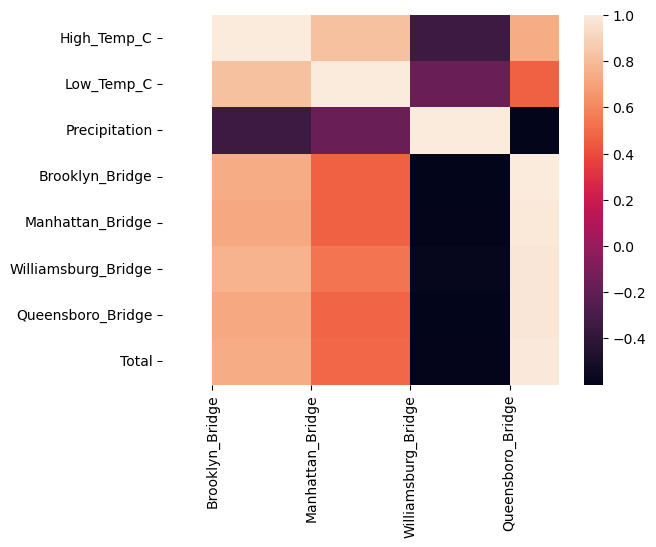

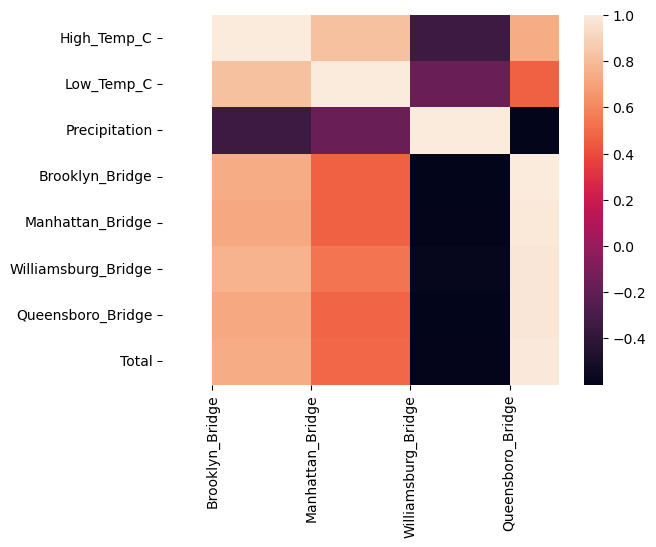

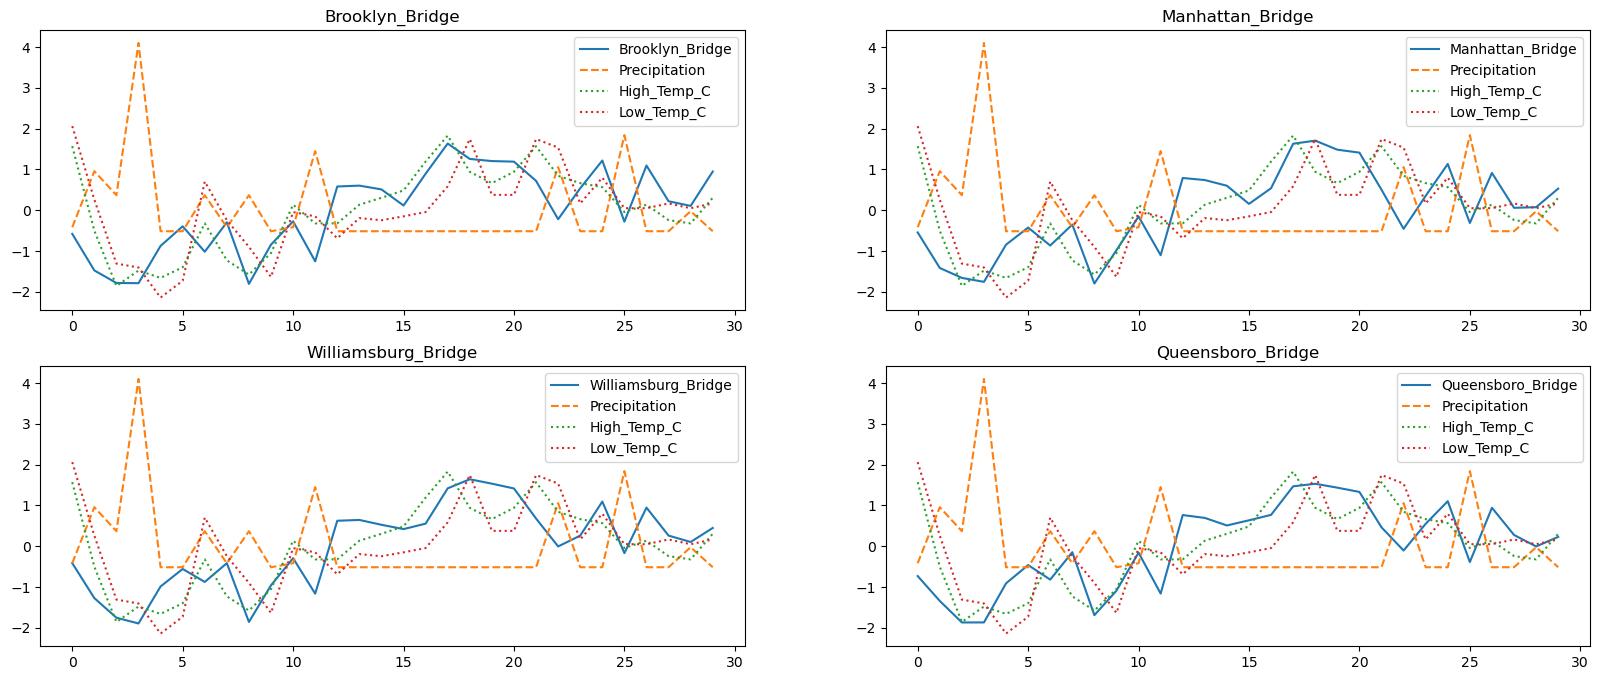

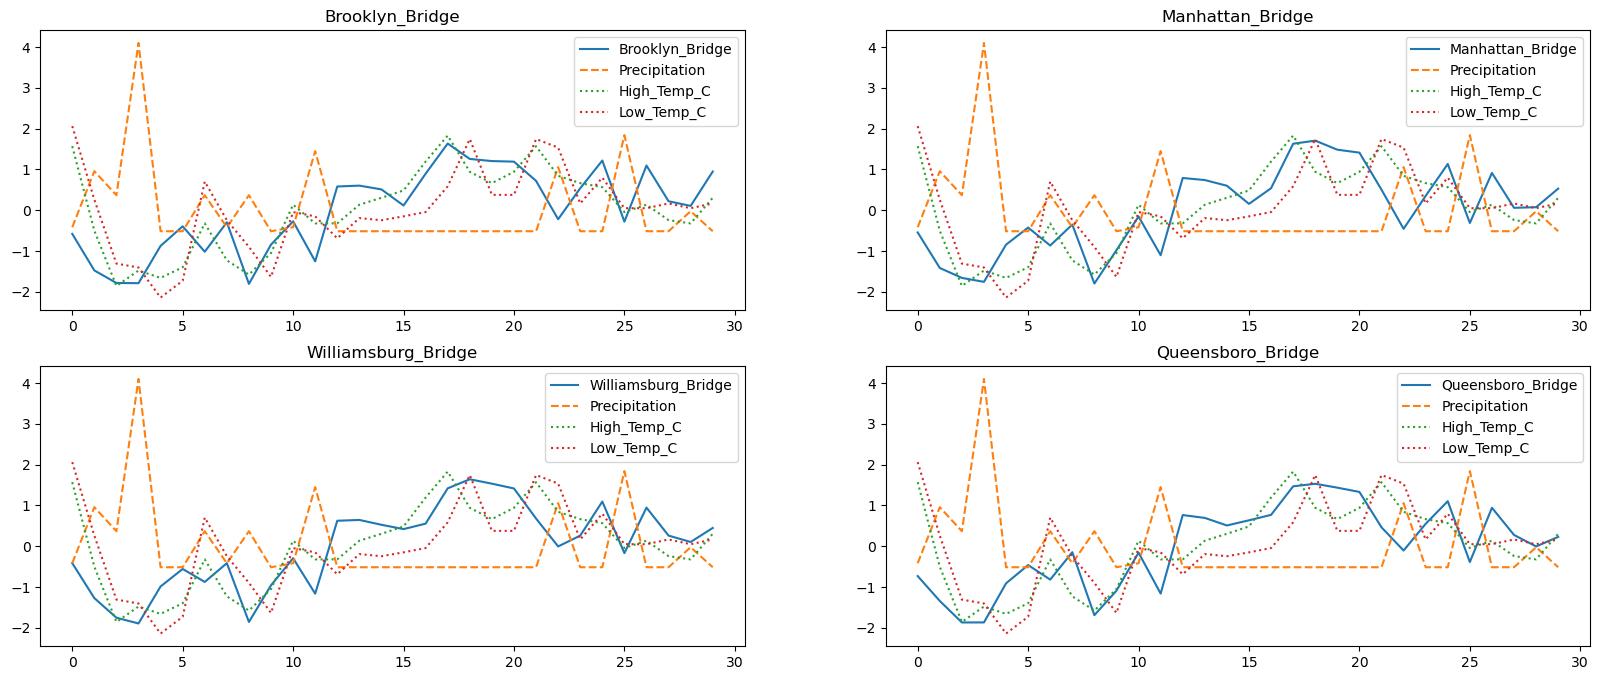

In [72]:
fig, axes = plt.subplots(2,2, figsize=(20,8))

df2.Brooklyn_Bridge.plot(ax= axes[0][0], legend = 'Bridge', title = 'Brooklyn_Bridge')
df2.Precipitation.plot(ax= axes[0][0], legend = 'Prec', linestyle = '--')
df2['High_Temp_C'].plot(ax= axes[0][0], legend = 'T max', linestyle = ':')
df2['Low_Temp_C'].plot(ax= axes[0][0], legend = 'T min', linestyle = ':')
df2.Manhattan_Bridge.plot(ax= axes[0][1], legend = 'Bridge', title = 'Manhattan_Bridge')
df2.Precipitation.plot(ax= axes[0][1], legend = 'Prec',  linestyle = '--')
df2['High_Temp_C'].plot(ax= axes[0][1], legend = 'T max', linestyle = ':')
df2['Low_Temp_C'].plot(ax= axes[0][1], legend = 'T min', linestyle = ':')
df2.Williamsburg_Bridge.plot(ax= axes[1][0], legend = 'Bridge', title = 'Williamsburg_Bridge')
df2.Precipitation.plot(ax= axes[1][0], legend = 'Prec',  linestyle = '--')
df2['High_Temp_C'].plot(ax= axes[1][0], legend = 'T max', linestyle = ':')
df2['Low_Temp_C'].plot(ax= axes[1][0], legend = 'T min', linestyle = ':')
df2.Queensboro_Bridge.plot(ax= axes[1][1], legend = 'Bridge', title = 'Queensboro_Bridge')
df2.Precipitation.plot(ax= axes[1][1], legend = 'Prec',  linestyle = '--')
df2['High_Temp_C'].plot(ax= axes[1][1], legend = 'T max', linestyle = ':')
df2['Low_Temp_C'].plot(ax= axes[1][1], legend = 'T min', linestyle = ':')
plt.show()

In [73]:
df2.columns

Index(['High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge', 'Total',
       'Date'],
      dtype='object')

Index(['High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge', 'Total',
       'Date'],
      dtype='object')

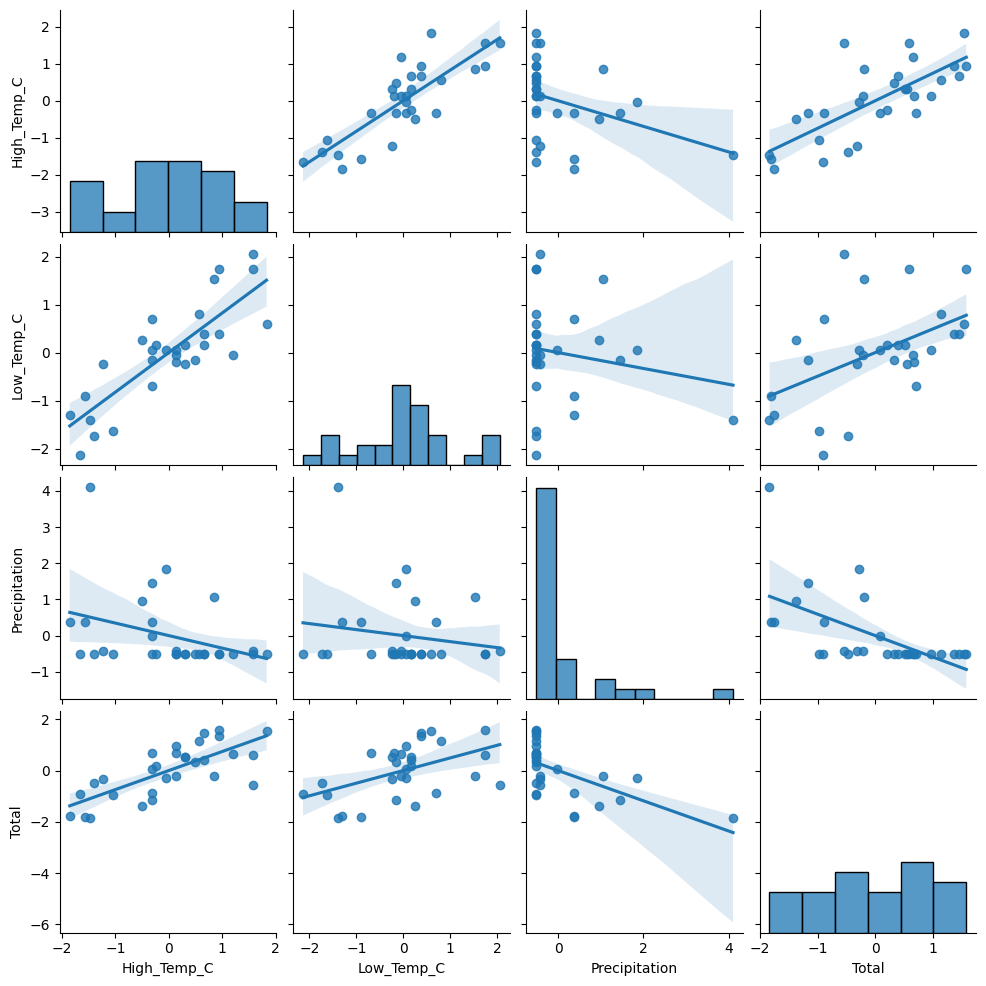

In [80]:
sns.pairplot(df2[['High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Total']], kind="reg")

In [ ]:
## Moving correlation window with 4 steps forward________________NC_01.11.2022

In [88]:
Tmax_ver_Brooklyn = df2['High_Temp_C'].rolling(4).corr(df2['Brooklyn_Bridge'])
Tmin_ver_Brooklyn_Bridge = df2['Low_Temp_C'].rolling(4).corr(df2['Brooklyn_Bridge'])
RR_vers_Brooklyn_Bridge = df2['Precipitation'].rolling(4).corr(df2['Brooklyn_Bridge'])

Tmax_ver_Manhattan = df2['High_Temp_C'].rolling(4).corr(df2['Manhattan_Bridge'])
Tmin_ver_Manhattan = df2['Low_Temp_C'].rolling(4).corr(df2['Manhattan_Bridge'])
RR_vers_Manhattan = df2['Precipitation'].rolling(4).corr(df2['Manhattan_Bridge'])

Tmax_ver_Williamsburg = df2['High_Temp_C'].rolling(4).corr(df2['Williamsburg_Bridge'])
Tmin_ver_Williamsburg = df2['Low_Temp_C'].rolling(4).corr(df2['Williamsburg_Bridge'])
RR_vers_Williamsburg = df2['Precipitation'].rolling(4).corr(df2['Williamsburg_Bridge'])

Tmax_ver_Queensboro = df2['High_Temp_C'].rolling(4).corr(df2['Queensboro_Bridge'])
Tmin_ver_Queensboro = df2['Low_Temp_C'].rolling(4).corr(df2['Queensboro_Bridge'])
RR_vers_Queensboro = df2['Precipitation'].rolling(4).corr(df2['Queensboro_Bridge'])


In [89]:
## create an Empty DataFrame object________________NC_01.11.2022
df_mov_cor = pd.DataFrame()
print(df_mov_cor)

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [91]:
## append columns to an empty DataFrame________________NC_01.11.2022
df_mov_cor ['Tmax_ver_Brooklyn'] = Tmax_ver_Brooklyn
df_mov_cor ['Tmin_ver_Brooklyn_Bridge'] = Tmin_ver_Brooklyn_Bridge
df_mov_cor ['RR_vers_Brooklyn_Bridge'] = RR_vers_Brooklyn_Bridge
df_mov_cor ['Tmax_ver_Manhattan'] = Tmax_ver_Manhattan
df_mov_cor ['Tmin_ver_Manhattan'] = Tmin_ver_Manhattan
df_mov_cor ['RR_vers_Manhattan'] = RR_vers_Manhattan
df_mov_cor ['Tmax_ver_Williamsburg'] = Tmax_ver_Williamsburg
df_mov_cor ['Tmin_ver_Williamsburg'] = Tmin_ver_Williamsburg
df_mov_cor ['RR_vers_Williamsburg'] = RR_vers_Williamsburg
df_mov_cor ['Tmax_ver_Queensboro'] = Tmax_ver_Queensboro
df_mov_cor ['Tmin_ver_Queensboro'] = Tmin_ver_Queensboro
df_mov_cor ['RR_vers_Queensboro'] = RR_vers_Queensboro
df_mov_cor ['Date'] = df['Date']
df_mov_cor 

Tmax_ver_Brooklyn  Tmin_ver_Brooklyn_Bridge  RR_vers_Brooklyn_Bridge  \
0                 NaN                       NaN                      NaN   
1                 NaN                       NaN                      NaN   
2                 NaN                       NaN                      NaN   
3            0.988680                  0.973972                -0.623919   
4            0.012682                 -0.359367                -0.649703   
5            0.523676                 -0.726846                -0.694251   
6            0.024968                 -0.139721                -0.930797   
7           -0.455844                 -0.207906                -0.647450   
8            0.099867                 -0.113546                -0.876714   
9            0.290025                  0.162088                -0.746461   
10           0.667494                  0.525711                -0.883154   
11           0.787761                  0.245118                -0.571467   
12           0.314787                  0.031149                -0.679977   
13           0.329353                 -0.539603                -0.907198   
14           0.543693                 -0.459040                -0.999045   
15          -0.705102                 -0.476209                      NaN   
16           0.527102                  0.455376                      NaN   
17           0.930410                  0.905661                      NaN   
18           0.878718                  0.597141                      NaN   
19           0.589346                  0.347567                      NaN   
20           0.968096                 -0.055057                      NaN   
21          -0.921466                 -0.482572                      NaN   
22          -0.054716                 -0.746003                -0.941407   
23           0.265152                 -0.479160                -0.883544   
24          -0.079111                 -0.320997                -0.876433   
25           0.287785                 -0.063341                -0.894131   
26           0.514984                  0.568756                -0.901326   
27           0.760098                  0.583105                -0.784395   
28           0.581398                 -0.075352                -0.727262   
29           0.937782                 -0.019405                -0.646083   

    Tmax_ver_Manhattan  Tmin_ver_Manhattan  RR_vers_Manhattan  \
0                  NaN                 NaN                NaN   
1                  NaN                 NaN                NaN   
2                  NaN                 NaN                NaN   
3             0.978609            0.971666          -0.673831   
4            -0.012682           -0.355849          -0.716347   
5             0.471807           -0.730724          -0.736798   
6             0.143016           -0.022236          -0.952159   
7            -0.335423           -0.093545          -0.542657   
8             0.223459           -0.018677          -0.812281   
9             0.424387            0.348555          -0.604551   
10            0.740371            0.621727          -0.822013   
11            0.885680            0.425886          -0.434552   
12            0.423129            0.168236          -0.565094   
13            0.290457           -0.573650          -0.896493   
14            0.498163           -0.499746          -0.996092   
15           -0.802620           -0.591132                NaN   
16           -0.215956           -0.238021                NaN   
17            0.829321            0.920806                NaN   
18            0.629258            0.851670                NaN   
19            0.020929            0.722578                NaN   
20            0.416118            0.823523                NaN   
21           -0.890478           -0.374062                NaN   
22           -0.219491           -0.845863          -0.871887   
23            0.165059           -0.524019          -0.791358   
24           -0.129859

Tmax_ver_Brooklyn  Tmin_ver_Brooklyn_Bridge  RR_vers_Brooklyn_Bridge  \
0                 NaN                       NaN                      NaN   
1                 NaN                       NaN                      NaN   
2                 NaN                       NaN                      NaN   
3            0.988680                  0.973972                -0.623919   
4            0.012682                 -0.359367                -0.649703   
5            0.523676                 -0.726846                -0.694251   
6            0.024968                 -0.139721                -0.930797   
7           -0.455844                 -0.207906                -0.647450   
8            0.099867                 -0.113546                -0.876714   
9            0.290025                  0.162088                -0.746461   
10           0.667494                  0.525711                -0.883154   
11           0.787761                  0.245118                -0.571467   
12           0.314787                  0.031149                -0.679977   
13           0.329353                 -0.539603                -0.907198   
14           0.543693                 -0.459040                -0.999045   
15          -0.705102                 -0.476209                      NaN   
16           0.527102                  0.455376                      NaN   
17           0.930410                  0.905661                      NaN   
18           0.878718                  0.597141                      NaN   
19           0.589346                  0.347567                      NaN   
20           0.968096                 -0.055057                      NaN   
21          -0.921466                 -0.482572                      NaN   
22          -0.054716                 -0.746003                -0.941407   
23           0.265152                 -0.479160                -0.883544   
24          -0.079111                 -0.320997                -0.876433   
25           0.287785                 -0.063341                -0.894131   
26           0.514984                  0.568756                -0.901326   
27           0.760098                  0.583105                -0.784395   
28           0.581398                 -0.075352                -0.727262   
29           0.937782                 -0.019405                -0.646083   

    Tmax_ver_Manhattan  Tmin_ver_Manhattan  RR_vers_Manhattan  \
0                  NaN                 NaN                NaN   
1                  NaN                 NaN                NaN   
2                  NaN                 NaN                NaN   
3             0.978609            0.971666          -0.673831   
4            -0.012682           -0.355849          -0.716347   
5             0.471807           -0.730724          -0.736798   
6             0.143016           -0.022236          -0.952159   
7            -0.335423           -0.093545          -0.542657   
8             0.223459           -0.018677          -0.812281   
9             0.424387            0.348555          -0.604551   
10            0.740371            0.621727          -0.822013   
11            0.885680            0.425886          -0.434552   
12            0.423129            0.168236          -0.565094   
13            0.290457           -0.573650          -0.896493   
14            0.498163           -0.499746          -0.996092   
15           -0.802620           -0.591132                NaN   
16           -0.215956           -0.238021                NaN   
17            0.829321            0.920806                NaN   
18            0.629258            0.851670                NaN   
19            0.020929            0.722578                NaN   
20            0.416118            0.823523                NaN   
21           -0.890478           -0.374062                NaN   
22           -0.219491           -0.845863          -0.871887   
23            0.165059           -0.524019          -0.791358   
24           -0.129859

In [92]:
df_mov_cor.columns

Index(['Tmax_ver_Brooklyn', 'Tmin_ver_Brooklyn_Bridge',
       'RR_vers_Brooklyn_Bridge', 'Tmax_ver_Manhattan', 'Tmin_ver_Manhattan',
       'RR_vers_Manhattan', 'Tmax_ver_Williamsburg', 'Tmin_ver_Williamsburg',
       'RR_vers_Williamsburg', 'Tmax_ver_Queensboro', 'Tmin_ver_Queensboro',
       'RR_vers_Queensboro', 'Date'],
      dtype='object')

Index(['Tmax_ver_Brooklyn', 'Tmin_ver_Brooklyn_Bridge',
       'RR_vers_Brooklyn_Bridge', 'Tmax_ver_Manhattan', 'Tmin_ver_Manhattan',
       'RR_vers_Manhattan', 'Tmax_ver_Williamsburg', 'Tmin_ver_Williamsburg',
       'RR_vers_Williamsburg', 'Tmax_ver_Queensboro', 'Tmin_ver_Queensboro',
       'RR_vers_Queensboro', 'Date'],
      dtype='object')

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
## Plot mobile correlation________________NC_01.11.2022

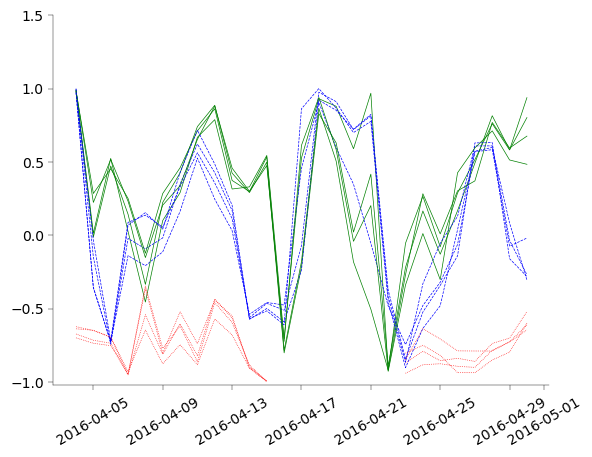

In [158]:
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(width=0.3, colors='black')
ax.yaxis.set_tick_params(width=0.3, colors='black')
plt.rcParams['axes.linewidth'] = 0.3

plt.plot('Date', 'Tmax_ver_Brooklyn', data=df_mov_cor, label ='Tmax_ver_Brooklyn', linewidth=0.5, color='g', linestyle='solid')
plt.plot('Date', 'Tmin_ver_Brooklyn_Bridge', data=df_mov_cor, label ='Tmin_ver_Brooklyn_Bridge', linewidth=0.5, color='b', linestyle='dashed')
plt.plot('Date', 'RR_vers_Brooklyn_Bridge', data=df_mov_cor, label ='RR_vers_Brooklyn_Bridge', linewidth=0.5, color='r', linestyle='dotted')

plt.plot('Date', 'Tmax_ver_Manhattan', data=df_mov_cor, label ='Tmax_ver_Manhattan', linewidth=0.5, color='g', linestyle='solid')
plt.plot('Date', 'Tmin_ver_Manhattan', data=df_mov_cor, label ='Tmin_ver_Manhattan', linewidth=0.5, color='b', linestyle='dashed')
plt.plot('Date', 'RR_vers_Manhattan', data=df_mov_cor, label ='RR_vers_Manhattan', linewidth=0.5, color='r', linestyle='dotted')

plt.plot('Date', 'Tmax_ver_Williamsburg', data=df_mov_cor, label ='Tmax_ver_Williamsburg', linewidth=0.5, color='g', linestyle='solid')
plt.plot('Date', 'Tmin_ver_Williamsburg', data=df_mov_cor, label ='Tmin_ver_Williamsburg', linewidth=0.5, color='b', linestyle='dashed')
plt.plot('Date', 'RR_vers_Williamsburg', data=df_mov_cor, label ='RR_vers_Williamsburg', linewidth=0.5, color='r', linestyle='dotted')

plt.plot('Date', 'Tmax_ver_Queensboro', data=df_mov_cor, label ='Tmax_ver_Queensboro', linewidth=0.5, color='g', linestyle='solid')
plt.plot('Date', 'Tmin_ver_Queensboro', data=df_mov_cor, label ='Tmin_ver_Queensbor', linewidth=0.5, color='b', linestyle='dashed')
plt.plot('Date', 'RR_vers_Queensboro', data=df_mov_cor, label ='RR_vers_Queensboro', linewidth=0.5, color='r', linestyle='dotted')
plt.ylim(-1.02,1.5)
plt.xticks(rotation=30)

plt.show()